# <font size=5> <font color = darkblue>Sentiment Analysis - Rotten_Tomatoes_Movie_Review
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']= True
pd.options.display.max_colwidth = 150

In [3]:
df = pd.read_csv('C:\\Users\\am236\\OneDrive - DXC Production\\Desktop\\DSBA\\Machine Learning\\Datasets\\Rotan Tomatoes.csv')
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2/6/2010,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will ...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2/6/2010,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching ..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2/9/2010,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2/9/2010,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- b..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2/10/2010,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again."


In [4]:
df.shape

(1048575, 8)

In [5]:
df.isnull().sum()

rotten_tomatoes_link         0
critic_name              17203
top_critic                   0
publisher_name               0
review_type                  0
review_score            283929
review_date                  0
review_content           61437
dtype: int64

## Dropping Unimportant Variables.

In [6]:
df.drop(['critic_name','review_date','publisher_name','review_score','top_critic','rotten_tomatoes_link'],axis =1,inplace=True)

In [7]:
df.head()

,review_type,review_content
0,Fresh,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will ...
1,Fresh,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching ..."
2,Fresh,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment."
3,Fresh,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- b..."
4,Rotten,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again."


In [8]:
df.review_type = df.review_type.map({'Fresh':1, 'Rotten':0}) ## Assigning Positive review as 1 and Negative review as 0
df.head()

,review_type,review_content
0,1,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will ...
1,1,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching ..."
2,1,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment."
3,1,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- b..."
4,0,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again."


<AxesSubplot:xlabel='review_type', ylabel='count'>

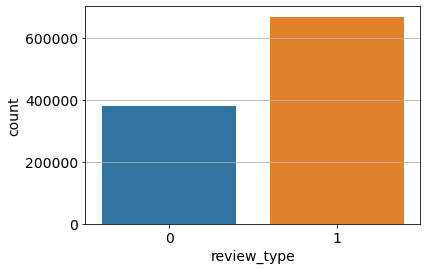

In [9]:
sns.countplot(data=df, x='review_type')

We do see there is a Class Imbalance in the Target variable. So we will be treating the class imbalance with Under Sampling teachnique since we have a larget amount of data.

In [10]:
df['review_type'].value_counts()/df.shape[0]*100

1    63.77026
0    36.22974
Name: review_type, dtype: float64

In [11]:
df['review_type'].value_counts()

1    668679
0    379896
Name: review_type, dtype: int64

## Dealing with Missing Values

In [12]:
df['review_content'].isnull().sum()

61437

In [13]:
df.dropna(inplace=True)   #Dropping the missing reviews

In [14]:
df['review_type'].value_counts()

1    632087
0    355051
Name: review_type, dtype: int64

In [15]:
X=df['review_content']
y=df['review_type']

## Undersampling - To treat class imbalance

In [16]:
minority_class_len =len(df[df['review_type']==0])
print(minority_class_len)

355051


In [17]:
majority_class_indices =df[df['review_type']==1].index
print(majority_class_indices)

Int64Index([      0,       1,       2,       3,       7,       8,       9,
                 10,      13,      15,
            ...
            1048552, 1048555, 1048558, 1048561, 1048564, 1048565, 1048566,
            1048569, 1048571, 1048574],
           dtype='int64', length=632087)


In [18]:
random_majority_indices=np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(len(random_majority_indices))

355051


In [19]:
minority_class_indices=df[df['review_type'] == 0].index
print(minority_class_indices)

Int64Index([      4,       5,       6,      11,      12,      14,      17,
                 19,      21,      22,
            ...
            1048557, 1048559, 1048560, 1048562, 1048563, 1048567, 1048568,
            1048570, 1048572, 1048573],
           dtype='int64', length=355051)


In [20]:
undersample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [21]:
undersample=df.loc[undersample_indices]

In [22]:
undersample

,review_type,review_content
4,0,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again."
5,0,It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.
6,0,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jumpstarter directed by Chris Columbus.
11,0,"For what it is and for whom it is intended, it's not a bad movie, just an indifferent one."
12,0,"Chris Columbus returns to his comfort zone for this mirthless, episodic fantasy saga based on the young-reader book series by Rick Riordan."
...,...,...
807431,1,A pill-popping drama that suddenly turns into something entirely different.
620009,1,"Neighbouring Sounds is a clever, original drama of social concern, with trivial incidents barely masking deep social fissures."
93241,1,"50/50 is not just another crude piece of mockery. Crude at times, yes, but at its occasionally uneven soul is a very funny and bluntly moving tale..."
464979,1,"What buoys the film and really makes it work are strong performances by its cast, many of them young newcomers."


In [23]:
path = 'RT.csv'
undersample.to_csv(path)

In [24]:
df1 = pd.read_csv('C:\\Users\\am236\\OneDrive - DXC Production\\Desktop\\DSBA\\Machine Learning\\Python Notebook\\RT.csv')
df1.head()

,Unnamed: 0,review_type,review_content
0,4,0,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again."
1,5,0,It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.
2,6,0,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jumpstarter directed by Chris Columbus.
3,11,0,"For what it is and for whom it is intended, it's not a bad movie, just an indifferent one."
4,12,0,"Chris Columbus returns to his comfort zone for this mirthless, episodic fantasy saga based on the young-reader book series by Rick Riordan."


In [25]:
df1.shape

(710102, 3)

In [26]:
df1.drop(['Unnamed: 0'],axis=1,inplace =True)

In [27]:
df1.head()

,review_type,review_content
0,0,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again."
1,0,It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.
2,0,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jumpstarter directed by Chris Columbus.
3,0,"For what it is and for whom it is intended, it's not a bad movie, just an indifferent one."
4,0,"Chris Columbus returns to his comfort zone for this mirthless, episodic fantasy saga based on the young-reader book series by Rick Riordan."


<AxesSubplot:xlabel='review_type', ylabel='count'>

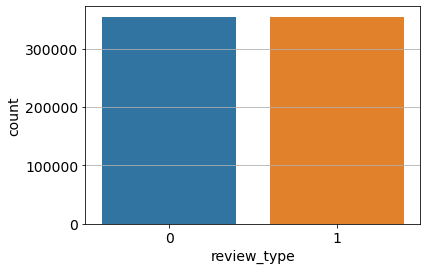

In [28]:
sns.countplot(data=df1, x='review_type')

As we can see, we have treated the Class imbalance and now accuracy can be a performance evaluation metric.

In [29]:
df1['review_type'].value_counts()

0    355051
1    355051
Name: review_type, dtype: int64

In [30]:
X=df1['review_content']
y=df1['review_type']

## Train_Test_Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=85, stratify=y)

In [33]:
X_train

607431    Ronald Coleman is one of the greatest leading men in American cinema. High tea style acting mixed with an air of swashbuckling macho. Zenda is a t...
232642                                                                          ...a blatant cash grab that has nothing to do with the source's sense of dread.
657699    Get Out finds that sweet spot of laughs, chills, and social commentary. It's so flat-out entertaining, you might not even notice how scathing it r...
120003                                                                                                                   ...an entirely needless piece of work.
296446    Talented actors McGregor, Watts and Gosling are wasted in a pretentious thriller that's located in a space between reality and illusion, life and ...
                                                                                  ...                                                                          
584538                 It is a jumble of

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
max_words = 1000 # N most common words are kept
cv = CountVectorizer(lowercase=True, 
                     stop_words= 'english',
                     max_df= 0.95,
                     max_features= max_words,
                     ngram_range=(1, 1))

In [36]:
count_train = cv.fit_transform(X_train)
count_test = cv.transform(X_test)

In [37]:
count_train

<532576x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2889660 stored elements in Compressed Sparse Row format>

In [38]:
pd.DataFrame(count_train.A, columns= cv.get_feature_names()).head()

C:\Users\am236\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,3d,90,ability,able,absolutely,act,acted,acting,action,...,worthy,wouldn,writer,writing,written,wrong,year,years,yes,young
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying ML Algorithms

In [39]:
count_train.A.shape

(532576, 1000)

### Naive Bayes Algorithms

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [41]:
%%time
nb = GaussianNB()
# nb = BernoulliNB()
#nb = MultinomialNB()
nb.fit(count_train.A, y_train)

print('Train Accuracy: ', nb.score(count_train.A, y_train))
print('Test Accuracy: ', nb.score(count_test.A, y_test))

Train Accuracy:  0.6912421889082497
Test Accuracy:  0.6899383752239109
Wall time: 1min 23s


## TFIDF_Vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
max_words = 1000
tf = TfidfVectorizer(lowercase=True, 
                     stop_words= 'english', 
                     max_df= 0.95, 
                     max_features= max_words)

In [44]:
tf_train = tf.fit_transform(X_train)
tf_test = tf.transform(X_test)

In [45]:
pd.DataFrame(tf_train.A, columns= tf.get_feature_names()).head()

C:\Users\am236\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,3d,90,ability,able,absolutely,act,acted,acting,action,...,worthy,wouldn,writer,writing,written,wrong,year,years,yes,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313215,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
%%time
#nb = GaussianNB()
#nb = BernoulliNB()
nb = MultinomialNB()
nb.fit(tf_train.A, y_train)

print('Train Accuracy: ', nb.score(tf_train.A, y_train))
print('Test Accuracy: ', nb.score(tf_test.A, y_test))

Train Accuracy:  0.7066521961184883
Test Accuracy:  0.7051192501380079
Wall time: 10.1 s


We can see our Model Accuracy is 70% which is not bad at all and the computational cost also very less.

In [47]:
from joblib import dump


In [48]:
dump(nb,"model.joblib")

['model.joblib']

In [49]:
dump(tf,"tfidf_vectors.joblib")


['tfidf_vectors.joblib']